In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import xlrd


In [5]:
data=pd.read_excel('Online Retail.xlsx')

In [6]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [30]:
country_counts=data["Country"].value_counts()
print(country_counts)

Country
United Kingdom          495478
Germany                   9495
France                    8557
EIRE                      8196
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               2002
Portugal                  1519
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Unspecified                446
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
Israel                     297
USA                        291
Hong Kong                  288
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58


In [31]:
unique_countires=data["Country"].nunique()
print(unique_countires)

38


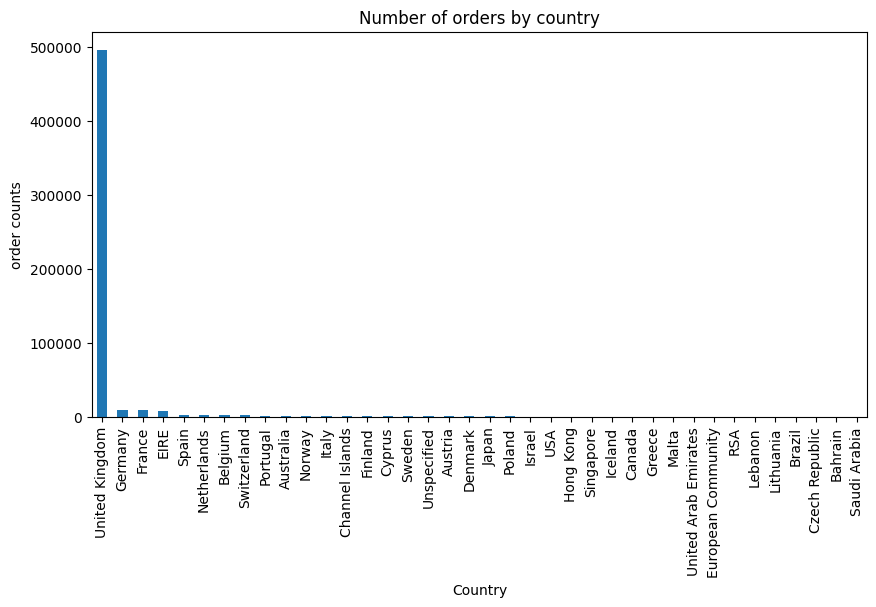

In [33]:
plt.figure(figsize=(10,5))
country_counts.plot(kind='bar')
plt.title("Number of orders by country")
plt.xlabel("Country")
plt.ylabel("order counts")
plt.xticks(rotation=90)
plt.show()

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [8]:
data.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


In [16]:
data["InvoiceDate"]=pd.to_datetime(data["InvoiceDate"])

Time Series analysis / every mounth total sales calculation

In [17]:
data["Sales"]=data["Quantity"]*data["UnitPrice"]
mounthly_sales=data.set_index("InvoiceDate").resample("M")["Sales"].sum()

C:\Users\muri-\AppData\Local\Temp\ipykernel_14200\862599667.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  mounthly_sales=data.set_index("InvoiceDate").resample("M")["Sales"].sum()


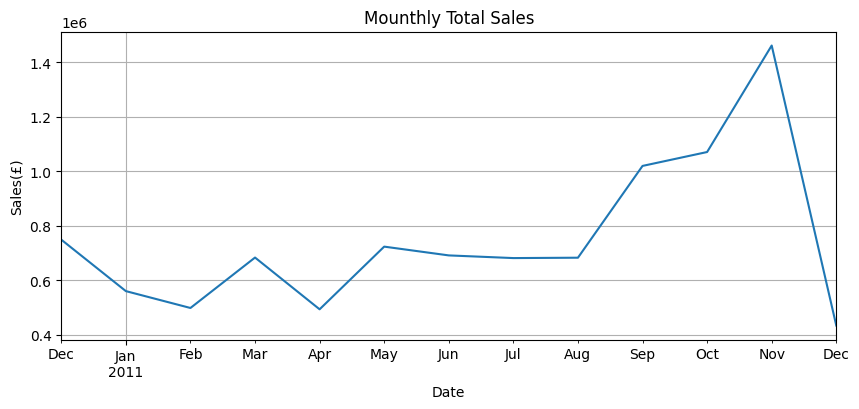

In [23]:
plt.figure(figsize=(10,4))
mounthly_sales.plot()
plt.title("Mounthly Total Sales")
plt.xlabel("Date")
plt.ylabel("Sales(£)")
plt.grid(True)
plt.show()

Product Popularity

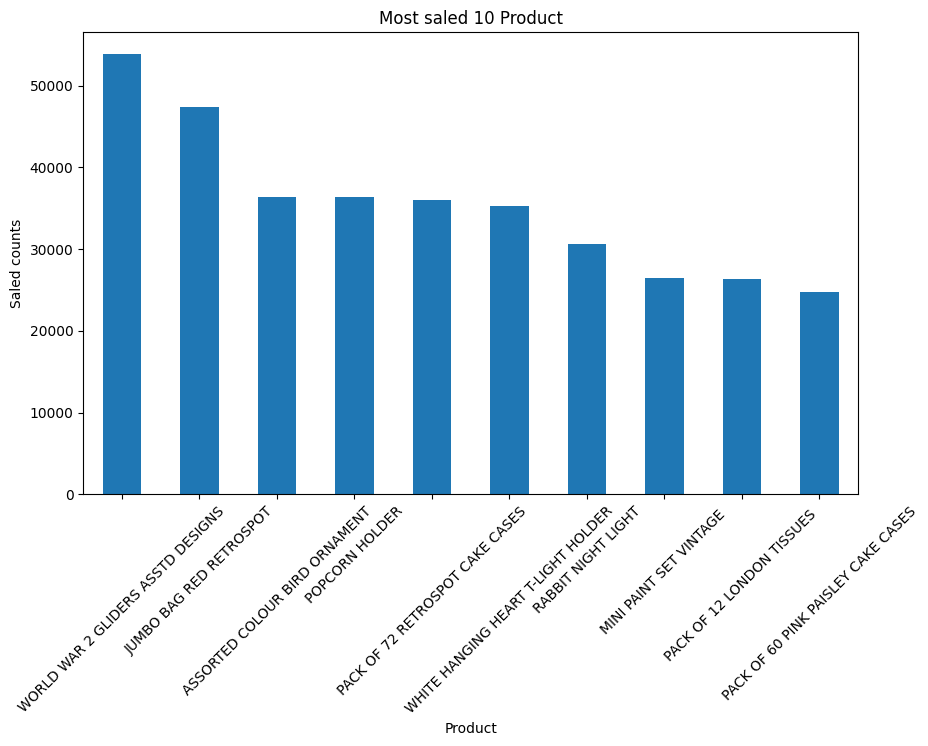

In [34]:
top_products=data.groupby('Description')["Quantity"].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,6))
top_products.plot(kind='bar')
plt.title("Most saled 10 Product")
plt.xlabel("Product")
plt.ylabel("Saled counts")
plt.xticks(rotation=45)
plt.show()

K-Means Clustering

In [35]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

Customer Data Prepareing

In [37]:
customer_data=data.groupby('CustomerID').agg({
    'Quantity':'sum',
    'Sales':'sum'

}).reset_index()



Rescale Data

In [38]:
scaler=StandardScaler()
customer_data_scaled=scaler.fit_transform(customer_data[['Quantity','Sales']])

K-Means Clustering

In [39]:
kmeans=KMeans(n_clusters=4)
customer_data['Cluster']=kmeans.fit_predict(customer_data_scaled)

Visiulation

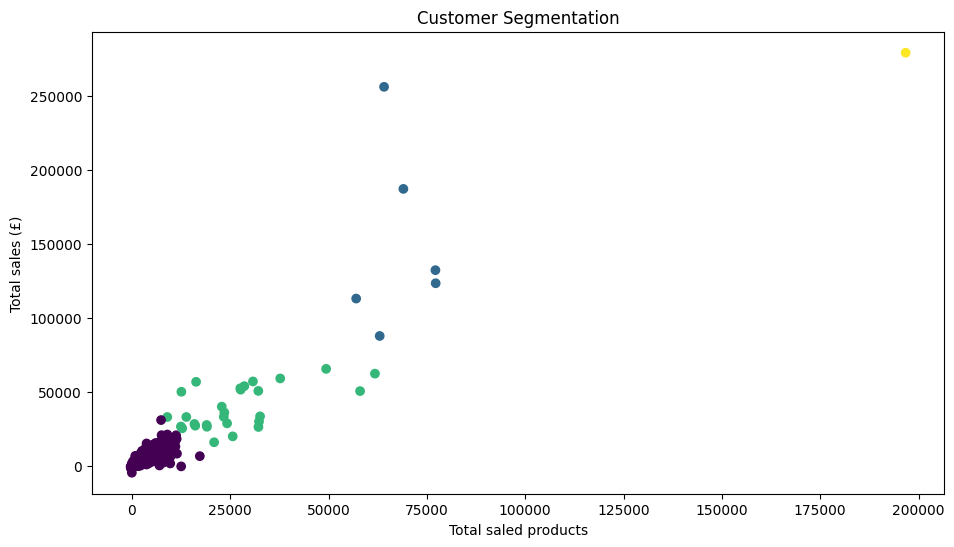

In [40]:
plt.figure(figsize=(11,6))
plt.scatter(customer_data['Quantity'], customer_data['Sales'], c=customer_data['Cluster'], cmap='viridis')
plt.title('Customer Segmentation')
plt.xlabel('Total saled products')
plt.ylabel('Total sales (£)')
plt.show()

Prediction model for customers Future Spending

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


In [47]:
data['TotalSpent'] = data['Quantity'] * data['UnitPrice']
rfm = data.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (data['InvoiceDate'].max() - x.max()).days,
    'InvoiceNo': 'count',
    'TotalSpent': 'sum'
}).reset_index()
rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']

# Hedef değişkeni ve özellikleri belirleyin
X = rfm[['Recency', 'Frequency', 'Monetary']]
y = rfm['Monetary']


In [48]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=43)

Model training

In [49]:
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

Predictions

In [50]:
y_pred=model.predict(X_test)

In [52]:
rmse=np.sqrt(mean_squared_error(y_test,y_pred))
print(f'Root mean Squared Error:{rmse}')

Root mean Squared Error:1.4421652081523487e-11


In [54]:
from sklearn.model_selection import cross_val_score
model=LinearRegression()
scores=cross_val_score(model,X,y,cv=5,scoring='neg_mean_squared_error')
rmse_scores=np.sqrt(-scores)
print("Cross-Validation RMSE Scores:", rmse_scores)
print("Mean RMSE:", rmse_scores.mean())
print("Standard Deviation of RMSE:", rmse_scores.std())

Cross-Validation RMSE Scores: [2.64405660e-12 3.51566831e-12 2.75756814e-12 1.19059865e-12
 1.14966672e-11]
Mean RMSE: 4.320911777546199e-12
Standard Deviation of RMSE: 3.665914062747952e-12


With Keras

In [58]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [59]:
import tensorflow as tf 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [60]:
model=Sequential()

Adding Dense

In [64]:
model.add(Dense(64,input_dim=X_train_scaled.shape[1],activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(16,activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam',loss=('mean_squared_error'))

c:\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


model training

In [65]:

history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2)


Epoch 1/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - loss: 31544148.0000 - val_loss: 114614520.0000
Epoch 2/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 18166818.0000 - val_loss: 38933576.0000
Epoch 3/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 5345959.5000 - val_loss: 9817744.0000
Epoch 4/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 2171900.7500 - val_loss: 3311242.5000
Epoch 5/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 639724.2500 - val_loss: 171659.9844
Epoch 6/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 131916.3281 - val_loss: 151980.8750
Epoch 7/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 65271.6641 - val_loss: 89369.6641
Epoch 8/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 58286.1172 - val_loss: 365315.4062
Epoch 9/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 112974.9141 - val_loss: 154018.4062
Epoch 10/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 294377.5000 - val_loss: 27107.7832
Epoch 11/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/st

In [66]:

from sklearn.metrics import mean_squared_error

# Tahminler yapın
y_pred = model.predict(X_test_scaled)

# RMSE hesaplayın
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Keras Model RMSE: {rmse}')


28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step
Keras Model RMSE: 174.0136635135528


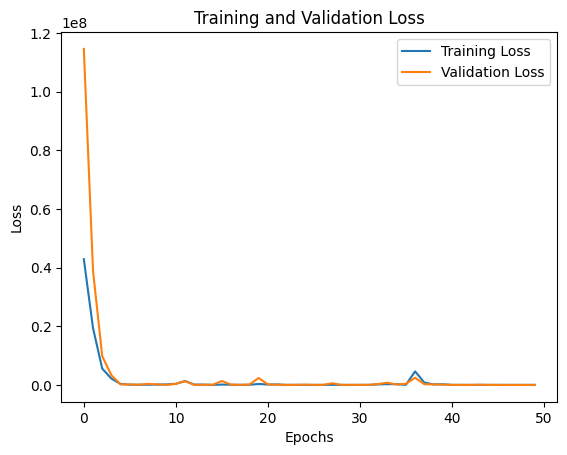

In [67]:


# Eğitim ve doğrulama kaybını görselleştirme
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
